In [150]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Функции

In [151]:
# Formatting column names
def format_column_name(column, function):
    original_col = dataFr.columns
    formated_column_name = {}
    for orig_column in original_col:
        formated_column_name[orig_column] = function(orig_column)
    data_format_column_name = dataFr.rename(columns=formated_column_name)
    return data_format_column_name


def process_data(data, function):
    categorials = {}
    for col in data.columns:
        data_column = data.loc[: , col]
        processed_data_col = []
        for act in function:
            processed_data_col.append(act[0])
            processed_data_col.append(act[1](data_column))
        categorials[col] = processed_data_col
    return(categorials)

def print_process_data(data_categorials):
    for categorials in data_categorials:
        print(categorials)
        print()
        for data in data_categorials[categorials]:
            print(data)
        print('------------------')
        

def depend_survived_param(ind, func_print):
    surv_by_param = data_format_column_name.pivot_table(values='survived', index=ind, aggfunc=surf_aggfuncs)
    not_surv_by_param = data_format_column_name.pivot_table(values='survived', index=ind, aggfunc=not_surf_aggfuncs)
    if func_print == True:
        print(surv_by_param)
        print(not_surv_by_param)
        print('----------------')
    else:
        return (surv_by_param, not_surv_by_param)
    
    
def data_depend_param(parameter):
    depend_param = depend_survived_param(parameter, False)

    list_param = depend_param[0].index.to_list()
    surv_list = depend_param[0]['<lambda_0>'].to_list()
    not_surv_list = depend_param[1]['<lambda_0>'].to_list()
    
    result = {}
    for i in range(0, len(list_param)):
        result[str(list_param[i])] = [round(depend_param[1]['<lambda_0>'].to_list()[i] * 100, 1), 
                                round(depend_param[0]['<lambda_0>'].to_list()[i] * 100, 1)]
    return result



def creating_data_graphs(name, ax, results):
    
    category_names = ['Погибшие', 'Выжившие']
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        text_color = 'white' 
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0.6, 0.8),
              loc='lower left', fontsize='small')
    ax.set_title(name)

    return a

1. Считывание файла из 'titanic.csv'

In [152]:
dataFr = pd.read_csv('titanic.csv')
print(dataFr[0:5])

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                      Name Passenger Gender Passenger   Age  \
0                            Braund, Mr. Owen Harris             male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...           female  38.0   
2                             Heikkinen, Miss. Laina           female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)           female  35.0   
4                           Allen, Mr. William Henry             male  35.0   

   SibSp  Parch            Ticket     Fare Cabin Embarked  
0      1      0         A/5 21171   7.2500   NaN        S  
1      1      0          PC 17599  71.2833   C85        C  
2      0      0  STON/O2. 3101282   7.9250   NaN        S  
3      1      0            113803  53.1000  C123        S  
4      0

a) Сколько столбцов и сколько строк в сохраненном DataFrame
b) Какой объем памяти занимает DataFrame
c) Сколько столбцов разных типов

In [153]:
# a)
print("В таблице {0} строк и {1} столбцов.".format(len(dataFr), len(dataFr.columns)))

В таблице 891 строк и 12 столбцов.


In [154]:
#  б)
memory = dataFr.memory_usage().sum()
print("DataFrame занимает объем памяти {0} КБ.".format(round(memory/1000,1)))

DataFrame занимает объем памяти 85.7 КБ.


In [155]:
# в)
counts_dtype = dataFr.dtypes.value_counts()
print("В таблице {0} столбца с разными типами: \n{1}.".format(len(counts_dtype), counts_dtype))

В таблице 3 столбца с разными типами: 
int64      5
object     5
float64    2
Name: count, dtype: int64.


2) Привести названия всех столбцов к виду: все названия строчные английские буквы без пробелов

In [156]:
format_column = lambda name: name.strip().lower().replace(' ', '_')
data_format_column_name = format_column_name(dataFr, format_column)
print(data_format_column_name[0:5])

   passengerid  survived  pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                      name_passenger gender_passenger   age  \
0                            Braund, Mr. Owen Harris             male  22.0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...           female  38.0   
2                             Heikkinen, Miss. Laina           female  26.0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)           female  35.0   
4                           Allen, Mr. William Henry             male  35.0   

   sibsp  parch            ticket     fare cabin embarked  
0      1      0         A/5 21171   7.2500   NaN        S  
1      1      0          PC 17599  71.2833   C85        C  
2      0      0  STON/O2. 3101282   7.9250   NaN        S  
3      1      0            113803  53.1000  C123        S  
4      0

3. Вывести статистику по каждому столбцу:

a) для категориальных переменных: количество уникальных значений,
моду, количество пропущенных значений
b) Для интервальных: медиану, среднее, квантиль 90, квантиль 10,
максимальное значение, минимальное значение, количество
пропущенных значений

In [157]:
# a)

categorial_names = ['survived', 'pclass', 'gender_passenger', 'embarked']
categorial_data = data_format_column_name.loc[: , categorial_names]

value_counts = lambda data: data.value_counts()
mode = lambda data: data.mode()
isnull = lambda data: data.isnull().sum()

categorial_func = [['Value', value_counts], ['Mode', mode], ['Null', isnull]]

categorial_data_process_value = process_data(categorial_data, categorial_func)

print_process_data(categorial_data_process_value)

survived

Value
survived
0    549
1    342
Name: count, dtype: int64
Mode
0    0
Name: survived, dtype: int64
Null
0
------------------
pclass

Value
pclass
3    491
1    216
2    184
Name: count, dtype: int64
Mode
0    3
Name: pclass, dtype: int64
Null
0
------------------
gender_passenger

Value
gender_passenger
male      577
female    314
Name: count, dtype: int64
Mode
0    male
Name: gender_passenger, dtype: object
Null
0
------------------
embarked

Value
embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Mode
0    S
Name: embarked, dtype: object
Null
2
------------------


In [158]:
# b

interval_column = ['age', 'sibsp', 'parch', 'fare']
interval_data = data_format_column_name.loc[: , interval_column]
median = lambda data: data.median()
mean = lambda data: round(data.mean(), 2)
quantile_10 = lambda data: data.quantile(0.1)
quantile_90 = lambda data: data.quantile(0.9)
max_data = lambda data: data.max()
min_data = lambda data: data.min()
interval_func = [['Median', median], ['Mean', mean], ['Quantile_10', quantile_10], 
                           ['Quantile_90', quantile_90], ['Min', min_data],['Max', max_data], 
                           ['Null', isnull]]

interval_data_process_value = process_data(interval_data, interval_func)

print_process_data(interval_data_process_value)

age

Median
28.0
Mean
29.7
Quantile_10
14.0
Quantile_90
50.0
Min
0.42
Max
80.0
Null
177
------------------
sibsp

Median
0.0
Mean
0.52
Quantile_10
0.0
Quantile_90
1.0
Min
0
Max
8
Null
0
------------------
parch

Median
0.0
Mean
0.38
Quantile_10
0.0
Quantile_90
2.0
Min
0
Max
6
Null
0
------------------
fare

Median
14.4542
Mean
32.2
Quantile_10
7.55
Quantile_90
77.9583
Min
0.0
Max
512.3292
Null
0
------------------


4. Посчитать долю выживших пассажиров

In [159]:
survived_passenger = categorial_data_process_value['survived'][1][1]
survived_rate = round(survived_passenger/len(dataFr) * 100, 1)

print('Survival rate: {0} %.'.format(survived_rate))

Survival rate: 38.4 %.


5. Посчитать долю и количество выживших пассажиров в зависимости от
следующих параметров:
a) класса каюты (переменная Pclass)
b) пол пассажира (переменная Gender Passenger)
c) порт посадки Embarked
d) Одновременно пол и класса каюты

In [160]:
# 5 a) b) c) d)
surf_aggfuncs = {'survived': [lambda a: np.sum(a==1)/len(dataFr), lambda a: np.sum(a==1)]}
not_surf_aggfuncs = {'survived': [lambda a: np.sum(a==0)/len(dataFr), lambda a: np.sum(a==0)]}

list_parameter = ['pclass', 'gender_passenger', 'embarked', ['gender_passenger', 'pclass']]

for parameter in list_parameter:
    depend_survived_param(parameter, True)


        <lambda_0>  <lambda_1>
pclass                        
1         0.152637         136
2         0.097643          87
3         0.133558         119
        <lambda_0>  <lambda_1>
pclass                        
1         0.089787          80
2         0.108866          97
3         0.417508         372
----------------
                  <lambda_0>  <lambda_1>
gender_passenger                        
female              0.261504         233
male                0.122334         109
                  <lambda_0>  <lambda_1>
gender_passenger                        
female              0.090909          81
male                0.525253         468
----------------
          <lambda_0>  <lambda_1>
embarked                        
C           0.104377          93
Q           0.033670          30
S           0.243547         217
          <lambda_0>  <lambda_1>
embarked                        
C           0.084175          75
Q           0.052750          47
S           0.479237         42

6. Постройте информативные/полезные графики, по которым можно понять зависимость выживших в зависимости от пола, класса каюты, порта посадки

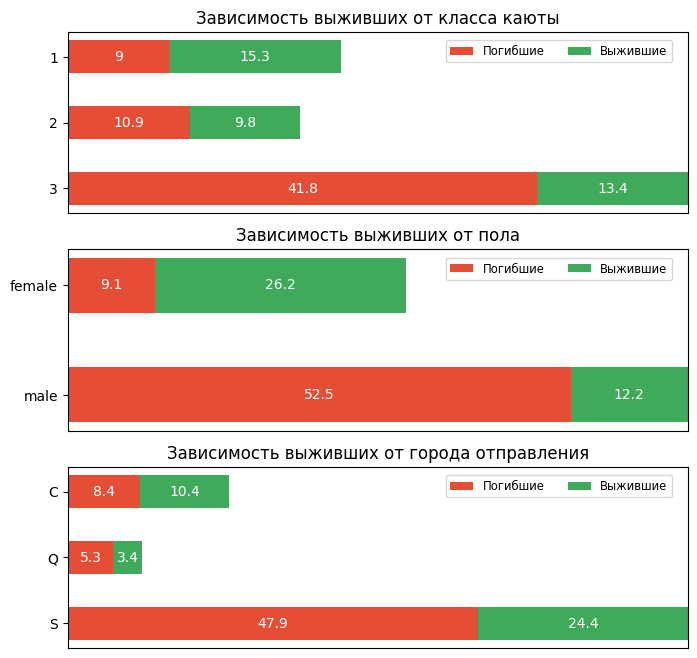

In [161]:
lable_graphs = [['pclass','Зависимость выживших от класса каюты'],
                ['gender_passenger','Зависимость выживших от пола'],
                ['embarked','Зависимость выживших от города отправления'],
                ]

fig, ax = plt.subplots(nrows = len(lable_graphs), ncols = 1)
fig.set_size_inches(8, 8)

for i in range (0, len(lable_graphs)):
    creating_data_graphs(lable_graphs[i][1], ax[i], data_depend_param(lable_graphs[i][0]))
    
plt.show()